
# 14 .IMPLEMENTING COORDINATE DESCENT

## 0. DATA PRE-PROCESSING

In [142]:
y_wine_quality = np.array(wine_quality['quality']).reshape((1599,1))

In [143]:
x_wine_quality_without_bias = np.array(wine_quality.iloc[:,:-1])

In [144]:
x_wine_quality=np.hstack((x_wine_quality_without_bias,np.ones((1599,1))))

In [145]:
x_wine_quality

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  1.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  1.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  1.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  1.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  1.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  1.   ]])

In [146]:
print(y_wine_quality.shape)
print(x_wine_quality.shape)

(1599, 1)
(1599, 12)


## 1. COORDINATE DESCENT

### 1.1 Defining the Functions 

#### 1. g(X,Y,beta,m)

In [147]:
def g_m(X,Y,beta,m):
    d=int(X.shape[0])
    X_m=np.delete(X, m, 1)
    beta_m = np.delete(beta,m,0)
    xm=X[:,m].reshape((d,1))
    return ((Y - (X_m@beta_m)).T @ xm)/(xm.T@xm)

#### 2.f(X,y,beta)

In [148]:
def f(X,Y,beta):
    return(Y-X@beta).T@(Y-X@beta)

#### 3. Minimize Coordinate Descent

In [149]:
def minimize_CD(X,Y,beta_initial,i_max):
    dim = int(beta_initial.shape[0])
    for i in range(0,i_max):
        beta_next=beta_initial
        for m in range(0,dim):
            beta_next[m]=g_m(X,Y,beta_next,m)
    return beta_next

#### 4. Learn-LInreg

In [150]:
def learn_linreg_CD(X,Y,i_max):
    dimension=int(X.shape[1])
    beta_zero = np.zeros((dimension,1))
    beta = minimize_CD(X,Y,beta_zero,i_max)
    return beta
    

### 2. Implementing CD Descent Algorithm

In [151]:
beta_list=[]
for i in range(1,200):
    a=learn_linreg_CD(x_wine_quality,y_wine_quality,i)
    beta_list.append(a)

In [152]:
table=pd.DataFrame(beta_list[0])
for i in range(0,199):
    table=pd.concat([table,pd.DataFrame(beta_list[i])],1)
table_new=pd.DataFrame(np.array(table))
zeros=pd.DataFrame(np.zeros((12,1)))
table_new =pd.concat([zeros,table_new],1)
table_new=pd.DataFrame(np.array(table_new).T)

In [153]:
table_new

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.651442,0.353127,-0.878587,0.064862,0.036232,0.007483,-0.001189,0.035029,0.009209,-0.018283,0.003060,-0.048716
2,0.651442,0.353127,-0.878587,0.064862,0.036232,0.007483,-0.001189,0.035029,0.009209,-0.018283,0.003060,-0.048716
3,0.629664,0.551912,-1.276574,0.090633,0.290524,0.012811,-0.002035,0.084818,0.017292,-0.017735,0.005379,-0.098449
4,0.610298,0.667673,-1.426714,0.097692,0.567653,0.016907,-0.002644,0.145313,0.024719,-0.008906,0.007418,-0.148607
...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.025358,-1.168601,-0.044299,0.010112,-2.009712,0.003896,-0.003365,6.238795,0.186837,1.010956,0.231179,-3.613602
197,0.025475,-1.168745,-0.045901,0.010057,-2.006141,0.003887,-0.003358,6.237894,0.186191,1.010524,0.231826,-3.617832
198,0.025592,-1.168874,-0.047483,0.010003,-2.002568,0.003879,-0.003351,6.236979,0.185545,1.010083,0.232468,-3.622008
199,0.025709,-1.168989,-0.049048,0.009949,-1.998994,0.003870,-0.003344,6.236051,0.184899,1.009636,0.233105,-3.626129


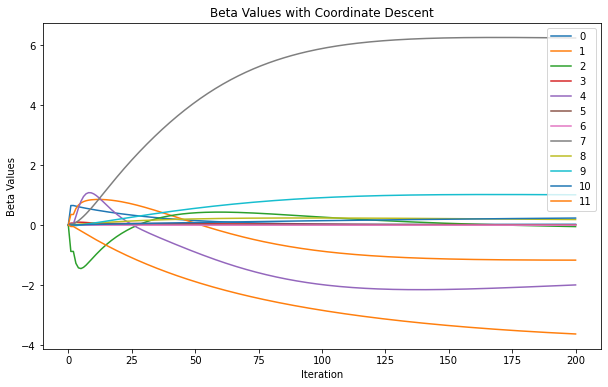

In [154]:
table_new.plot(title='Beta Values with Coordinate Descent',figsize=(10,6))
plt.legend(table_new, loc='upper right')
plt.xlabel('Iteration')
plt.ylabel('Beta Values')
plt.show()

## 2. COORDINATE DESCENT WITH L1

### 1. Defining the Functions

#### 1. Soft Function

In [174]:
def soft(x,e):
    if x>e:
        result=x-e
    elif x<-e:
        result=x+e
    elif abs(x)<=e:
        result=0
    return result
        

#### 2. Regularization Part

In [175]:
def reg_part(X,lamba,m):
    d=int(X.shape[0])
    xm=X[:,m].reshape((d,1))
    return lamba/(xm.T@xm)

#### 3. Function g(X,Y,beta,lamba)

In [176]:
def g_regularized(X,Y,beta,m,lamba):
    d=int(X.shape[0])
    X_m=np.delete(X, m, 1)
    beta_m = np.delete(beta,m,0)
    xm=X[:,m].reshape((d,1))
    value_one =((Y - (X_m@beta_m)).T @ xm)/(xm.T@xm)
    value_two =reg_part(X,lamba,m)
    return soft(value_one,value_two)

#### Minimize CD with Regularization

In [177]:
def reg_minimize_CD(X,Y,beta_initial,lamba,i_max):
    dim = int(beta_initial.shape[0])
    for i in range(0,i_max):
        beta_next=beta_initial
        for m in range(0,dim):
            beta_next[m]=g_regularized(X,Y,beta_initial,m,lamba)
    return beta_next

#### 3. Coordinate Descent with Regularization

In [178]:
def reg_learn_linreg_CD(X,Y,lamba,i_max):
    dimension=int(X.shape[1])
    beta_zero = np.zeros((dimension,1))
    beta = reg_minimize_CD(X,Y,beta_zero,lamba,i_max)
    return beta
    

### 2. Implementing CD Descent with Regularization Algorithm

In [199]:
reg_cd=[]
for l in range(1,100):
    b=reg_learn_linreg_CD(x_wine_quality,y_wine_quality,50,l)
    reg_cd.append(b)

In [200]:
reg_table=pd.DataFrame(reg_cd[0])
for i in range(0,99):
    reg_table=pd.concat([reg_table,pd.DataFrame(reg_cd[i])],1)

In [201]:
table_reg=pd.DataFrame(np.array(reg_table))
zeros=pd.DataFrame(np.zeros((12,1)))
table_reg =pd.concat([zeros,table_reg],1)
table_reg=pd.DataFrame(np.array(table_reg).T)

In [202]:
table_reg

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.651009,0.258472,-0.482912,0.043169,0.0,0.007891,-0.001187,0.001537,0.016414,0.000000,0.002240,-0.013383
2,0.651009,0.258472,-0.482912,0.043169,0.0,0.007891,-0.001187,0.001537,0.016414,0.000000,0.002240,-0.013383
3,0.623972,0.410961,-0.649446,0.059744,0.0,0.014270,-0.002025,0.022546,0.031911,0.000000,0.004773,-0.026868
4,0.598913,0.504592,-0.651575,0.063107,0.0,0.019194,-0.002615,0.058833,0.046809,0.000000,0.007460,-0.040028
...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.054008,-0.551645,0.000000,0.000000,0.0,0.003958,-0.003439,0.613758,0.711627,0.201223,0.237807,0.000000
97,0.054480,-0.550721,0.000000,0.000000,0.0,0.003920,-0.003420,0.573177,0.716515,0.201619,0.239637,0.000000
98,0.054972,-0.549615,0.000000,0.000000,0.0,0.003884,-0.003400,0.532496,0.721396,0.201977,0.241454,0.000000
99,0.055485,-0.548333,0.000000,0.000000,0.0,0.003851,-0.003381,0.491725,0.726268,0.202299,0.243257,0.000000


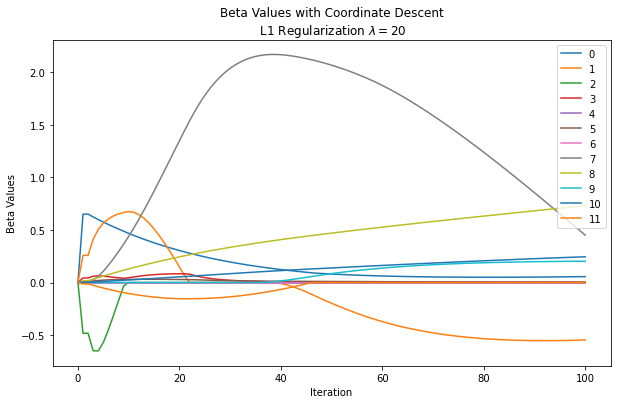

In [206]:
table_reg.plot(title='Beta Values with Coordinate Descent\n L1 Regularization $\lambda =20$',figsize=(10,6))
plt.legend(A, loc='upper right')
plt.xlabel('Iteration')
plt.ylabel('Beta Values')
plt.show()

# EXERCISE 3: CONCLUSION

Betas of non regularized model is greater than regularized one.
Regularization forces to Betas to be zero to overcome overfitting.